In [104]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [48]:
df_features = pd.read_csv('datasets/Features data set.csv')
df_sales = pd.read_csv('datasets/sales data-set.csv')
df_stores = pd.read_csv('datasets/stores data-set.csv')

In [53]:
df_features.shape

(8190, 12)

In [54]:
df_features.isna().sum()/df_features.shape[0]

Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.507692
MarkDown2       0.643346
MarkDown3       0.558852
MarkDown4       0.577045
MarkDown5       0.505495
CPI             0.071429
Unemployment    0.071429
IsHoliday       0.000000
dtype: float64

In [51]:
df_sales.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [52]:
df_stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [55]:
for i in range(1, 6):
    df_features.drop('MarkDown{}'.format(i), inplace=True, axis=1)

In [56]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,211.350143,8.106,False


In [57]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 392.0+ KB


In [58]:
df_features.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,172.460809,7.826821
std,12.987966,18.678607,0.431337,39.738346,1.877259
min,1.000000,-7.290000,2.472000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,132.364839,6.634000
50%,23.000000,60.710000,3.513000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,213.932412,8.567000
max,45.000000,101.950000,4.468000,228.976456,14.313000


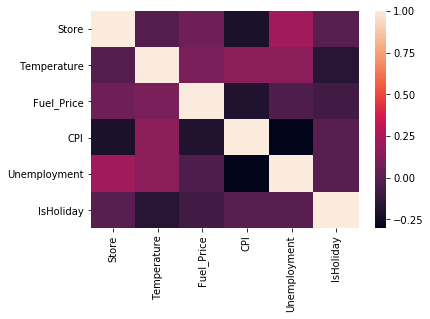

In [61]:
sns.heatmap(df_features.corr());

In [63]:
df_features.isna().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64

In [73]:
df_features[df_features.isna().sum(axis=1).astype('bool')].head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
169,1,03/05/2013,66.66,3.386,NaN,NaN,False
170,1,10/05/2013,63.90,3.392,NaN,NaN,False
171,1,17/05/2013,69.53,3.454,NaN,NaN,False
172,1,24/05/2013,77.19,3.494,NaN,NaN,False
173,1,31/05/2013,78.02,3.466,NaN,NaN,False


In [80]:
df_features.fillna(df_features.median(axis=0), axis=0).head().isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [81]:
df_features.fillna(df_features.median(axis=0), axis=0, inplace=True)

In [88]:
df_features['Date'] = df_features['Date'].astype('datetime64[ns]')

In [91]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
Store           8190 non-null int64
Date            8190 non-null datetime64[ns]
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
CPI             8190 non-null float64
Unemployment    8190 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 392.0 KB


In [92]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,211.350143,8.106,False


In [96]:
df_features['Store'].unique().shape

(45,)

In [100]:
pd.get_dummies(df_features, columns=['Store'])

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store_1,Store_2,Store_3,Store_4,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,2010-05-02,42.31,2.572,211.096358,8.106,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-12-02,38.51,2.548,211.242170,8.106,True,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-02-19,39.93,2.514,211.289143,8.106,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,46.63,2.561,211.319643,8.106,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-05-03,46.50,2.625,211.350143,8.106,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2010-12-03,57.79,2.667,211.380643,8.106,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2010-03-19,54.58,2.720,211.215635,8.106,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2010-03-26,51.45,2.732,211.018042,8.106,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2010-02-04,62.27,2.719,210.820450,7.808,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2010-09-04,65.86,2.770,210.622857,7.808,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


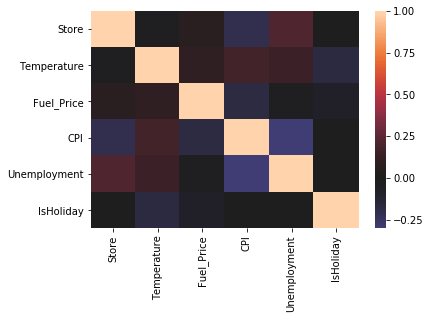

In [103]:
sns.heatmap(df_features.corr(), center=.0);

In [108]:
df_features = pd.get_dummies(df_features, columns=['Store'])

In [140]:
df_features['Date'] = df_features['Date'].apply(lambda s:int(s.timestamp()))

In [141]:
df_features.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store_1,Store_2,Store_3,Store_4,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1272758400,42.31,2.572,211.096358,8.106,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1291248000,38.51,2.548,211.242170,8.106,True,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1266537600,39.93,2.514,211.289143,8.106,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1267142400,46.63,2.561,211.319643,8.106,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1272844800,46.50,2.625,211.350143,8.106,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
data_num = df_features.loc[:, ['Date', 'Temperature', 'CPI', 'Unemployment']]

In [150]:
data_num = (data_num - data_num.mean()) / data_num.std()

In [155]:
non_numerical = list(set(df_features.columns)-set(data_num.columns))

In [159]:
df_features = pd.concat([df_features[non_numerical], data_num], axis=1)

In [160]:
y = df_features['Fuel_Price']

In [162]:
X = df_features[list(set(df_features.columns) - set(('Fuel_Price',)))]

### Checking the most important features

In [167]:
from sklearn.cross_validation import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=.3)

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV

In [166]:
rf_model = RandomForestRegressor(max_depth=4, n_estimators=10, n_jobs=-1, random_state=19, verbose=1)

In [171]:
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=19, verbose=1, warm_start=False)

In [180]:
importance = rf_model.feature_importances_
importance.sort()

In [182]:
importance /= importance.sum()

In [187]:
importance

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.25628684e-06, 9.06609849e-05, 1.20187622e-04, 3.62288607e-04,
       5.69969166e-04, 2.39792439e-03, 2.45375401e-03, 4.36576175e-02,
       1.00984794e-01, 8.49353548e-01])